# Part 1. Data vectorization and preparation for the problem of classification



## Chose dataset. You can either choose your own data set or one of the proposed ones.

**Description of the Dataset:**

The dataset appears to focus on the energy performance of buildings. Each row likely corresponds to a specific building or design. Below is an explanation of the columns:

*   **Relative_Compactness**: Indicates how compact the building's shape is.
*   **Surface_Area**: Represents the total exterior surface area of the building.
*   **Wall_Area**: The combined area of all the building's walls.
*   **Roof_Area**: The total area of the roof.
*   **Overall_Height**: The height of the building structure.
*   **Orientation**: The cardinal direction the building faces, probably encoded *   numerically.
*   **Glazing_Area**: The total area covered by windows or other glass surfaces.
*   **Glazing_Area_Distribution**: Numerical codes representing how the glass *   surfaces are distributed around the building.
*   **Heating_Load**: Energy consumption needed to heat the building.
*   **Cooling_Load**: Energy consumption required to cool the building.
*   **Class**: A categorical variable indicating the building's energy efficiency classification, likely labeled as B or C in this dataset.

**The Classification Task:**

The goal of a machine learning model trained on this data would likely be to predict the energy efficiency class (Class) of a building based on its physical characteristics (the other columns).

In [1]:
# Import the pandas library, which is essential for working with data in Python.
import pandas as pd

df = pd.read_csv('ST78666.csv')

##  Load data set and transform it into the form of “numpy array”

In [2]:
import numpy as np

# Convert the DataFrame to a NumPy array
data_array = df.to_numpy()

## Display information about the dimension of the array (the number of observations and
the number of variables).

In [3]:
print(data_array.shape)
print("Number of observations:", data_array.shape[0])
print("Number of variables:", data_array.shape[1])

(200, 11)
Number of observations: 200
Number of variables: 11


## Delete the rows with empties in data

In [4]:
# Remove rows with any missing values
df_cleaned = df.dropna()
data_array_cleaned = df_cleaned.to_numpy()

## Convert categorical variables from string format to binary (preparation for classificationtask). Apply one-hot encoding.

In [5]:
# Identify categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns  # Identify categorical columns

# Apply one-hot encoding
df_categorical_dummy=pd.get_dummies(df_cleaned, columns = categorical_columns, drop_first=False)

## Display the first 5 observations.

In [6]:
df_categorical_dummy.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Class_A,Class_B,Class_C,Class_D,Class_E
0,0.90,563.5,318.5,122.5,7.0,4,0.0,0,20.71,25.16,False,False,True,False,False
1,0.90,563.5,318.5,122.5,7.0,5,0.0,0,19.68,29.60,False,True,False,False,False
2,0.86,588.0,294.0,147.0,7.0,5,0.0,0,18.31,27.87,False,True,False,False,False
3,0.82,612.5,318.5,147.0,7.0,5,0.0,0,15.98,24.93,False,True,False,False,False
4,0.76,661.5,416.5,122.5,7.0,2,0.0,0,24.77,29.79,False,False,True,False,False


## Divide the dataset into two subsamples in the proportion of 0.75 and 0.25. 75% of the
observations should be in the first subsample, and the remaining 25% in the second.

In [7]:
from sklearn.model_selection import train_test_split

# Assuming df_categorical_dummy is your DataFrame after one-hot encoding
# Split the data into training and testing sets
train_data, test_data = train_test_split(df_categorical_dummy, test_size=0.25, random_state=42) # random_state for reproducibility

# Display the shapes of the resulting DataFrames
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (150, 15)
Testing data shape: (50, 15)


In [8]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_categorical_dummy, test_size=0.25, random_state=42)

# Part 2. Decision tree creation and performance evaluation

##  The selected and prepared dataset should be divided into subsamples for training and validation. Cross-validation is allowed.

In [9]:
print("Training set shape:", df_train.shape)
print("Testing set shape:", df_test.shape)

Training set shape: (150, 15)
Testing set shape: (50, 15)


## Implement/run an algorithm for building a decision tree (recommended "Iterative Dichotomiser" algorithm)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

y = df_cleaned['Class']
X = df_categorical_dummy

## Train the algorithm on the training set and evaluate the performance on the test set

In [11]:
# Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the decision tree classifier
#clf = DecisionTreeClassifier(criterion="entropy") #Using entropy for information gain
clf = DecisionTreeClassifier(criterion="gini") #Using gini for gini index

clf.fit(X_train, y_train)

DecisionTreeClassifier()

## Display the number of leaves, depth (depth), metric value (gini by default)


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

num_leaves = clf.get_n_leaves()
print(f"Number of leaves: {num_leaves}")

depth = clf.get_depth()
print(f"Depth of the tree: {depth}")

criterion = clf.criterion
print(f"Criterion used for splits: {criterion}")

Number of leaves: 5
Depth of the tree: 4
Criterion used for splits: gini


**Number of Leaves: 5**

*   The tree has 5 terminal nodes (leaves), each representing a final prediction outcome.
*   In this case, the leaves likely correspond to the 5 energy efficiency classes being predicted (e.g., A, B, C, D, E).

**Depth of the Tree: 4**

*   The maximum path length from the root node to any leaf is 4.
*   This indicates up to 4 decision points (splits) are made before a final prediction is reached.

**Criterion Used for Splits: Gini**

*   The Gini impurity was used to evaluate the quality of splits.
*   Gini Impurity: Measures the likelihood of incorrect classification if a data point is randomly assigned a label based on the class distribution at the node.
*   The algorithm selects splits that minimize Gini impurity, striving to create groups that are as pure (homogeneous) as possible.

## Calculate and display the performance for the training and test subsamples.


In [13]:
# Accuracy on the test data sample
clf.score(X_train, y_train)

1.0

In [14]:
# Accuracy on the test data sample
clf.score(X_test, y_test)

1.0

In [15]:
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_data={'prediction':y_pred,'true_values':y_test}
y_df=pd.DataFrame( y_data)
y_df.head()

,prediction,true_values
95,B,B
15,B,B
30,C,C
158,A,A
128,B,B


In [16]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  1.0


**Conclusion**

An accuracy of 1.0 may indicate either excellent performance or potential issues such as overfitting or improper data splits.

In [17]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        10
           B       1.00      1.00      1.00        20
           C       1.00      1.00      1.00         8
           D       1.00      1.00      1.00         6
           E       1.00      1.00      1.00         6

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
[[10  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0  6]]


## Display the trained model graphically.


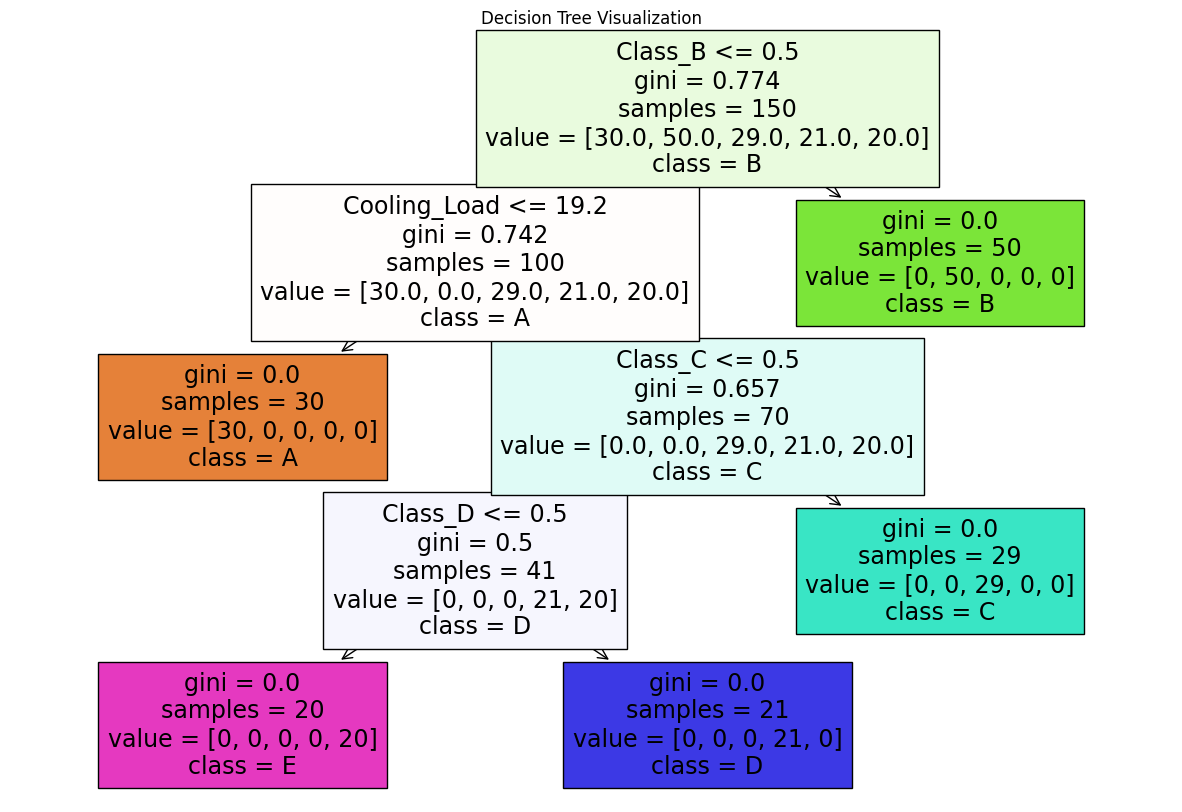

In [18]:
plt.figure(figsize=(15, 10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=[str(cls) for cls in clf.classes_],
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()

**Decision Tree Analysis:**

This decision tree classifies data points based on three features: Class_B, Class_A, and Heating_Load. Below is a breakdown of the rules and structure:

***Root Node (Class_B <= 0.50):***

*   If Class_B <= 0.50, follow the left branch.
*   If Class_B > 0.50, follow the right branch and directly predict Class B.

  *   Insight: A Class_B value above 0.50 strongly indicates Class B.

***Left Branch (Class_B <= 0.50):***

*   Class_A <= 0.50: Continue down the left branch.
*   Class_A > 0.50: Predict Class A.
  *   Insight: A Class_A value above 0.50 is a strong indicator of Class A, regardless of other features.

***Further Down the Left Branch (Class_B <= 0.50 and Class_A <= 0.50):***

*   Heating_Load <= 30.75: Predict Class C.
*   Heating_Load > 30.75: Evaluate further:
  *   Heating_Load <= 40.49: Predict Class D.
  *   Heating_Load > 40.49: Predict Class E.

---
**Summary:**
The decision tree applies a hierarchical set of rules:

* Class_B and Class_A are primary features, used for the first splits.

* Heating_Load refines the classification further, splitting into specific classes (C, D, or E).

# Part 3. Logistic regression

##  The selected and prepared dataset should be divided into subsamples for training and validation. Cross-validation is allowed.


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Implement/run an algorithm for logistic regression model creation



In [44]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=500, random_state=42, class_weight='balanced')

## Train the algorithm on the training set and evaluate the performance on the test set.

To address the convergence issue in the Logistic Regression model, I applied feature scaling using ***StandardScaler***. Scaling was necessary because Logistic Regression is sensitive to the scale of input features. When features have different ranges, the optimization algorithm may struggle to converge efficiently, as larger-scale features dominate the gradient calculations.

By standardizing the features (mean = 0, standard deviation = 1), I ensured that all features contributed equally during optimization. This preprocessing step:

1.   Resolved the ConvergenceWarning that occurred due to the default iteration limit.
2.   Stabilized and accelerated the optimization process.
3.   Ensured the model could reach an optimal solution without modifying the dataset or changing the solver.

Feature scaling is a standard practice for algorithms that rely on gradient-based optimization, and it proved effective in this scenario.

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on the training set
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluate performance using accuracy
from sklearn.metrics import accuracy_score

train_accuracy = logreg.score(X_train_scaled, y_train)
test_accuracy = accuracy_score(y_test, y_pred_logreg)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Evaluate the model
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, y_pred_logreg))
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_logreg))


Training Accuracy: 1.00
Testing Accuracy: 1.00
Logistic Regression Accuracy: 1.0
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        10
           B       1.00      1.00      1.00        20
           C       1.00      1.00      1.00         8
           D       1.00      1.00      1.00         6
           E       1.00      1.00      1.00         6

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix (Logistic Regression):
[[10  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0  6]]


## Display the model’s parameters (coefficients and intercept)

In [47]:
# Display coefficients and intercept
coefficients = logreg.coef_
intercept = logreg.intercept_

print("Model Coefficients:", coefficients)
print("Model Intercept:", intercept)


Model Coefficients: [[-0.12488157  0.11960118 -0.3471496   0.29289734 -0.31293823  0.0200216
  -0.38420383 -0.17019006 -0.3496455  -0.34759753  1.05717458 -0.60929747
  -0.20856606 -0.10048751 -0.05416079]
 [-0.18008316  0.22540359 -0.01634625  0.21119156 -0.24766482  0.11677905
  -0.01479952 -0.10381235 -0.29911227 -0.19358724 -0.73427237  1.25774492
  -0.35143913 -0.24992004 -0.21678026]
 [ 0.2291263  -0.24314032 -0.04126019 -0.19634543  0.27555737  0.02479519
  -0.08923364  0.17214458 -0.0251671  -0.0522811  -0.20002667 -0.32839321
   1.32594515 -0.48056527 -0.35908414]
 [ 0.15033444 -0.13639405  0.19874803 -0.22869444  0.14624929 -0.10442542
   0.1217259   0.08539537  0.24069464  0.18844987 -0.07568456 -0.1787786
  -0.43604206  1.30163752 -0.48509971]
 [-0.074496    0.03452959  0.20600802 -0.07904904  0.13879639 -0.05717044
   0.3665111   0.01646246  0.43323023  0.405016   -0.04719098 -0.14127564
  -0.32989789 -0.4706647   1.11512491]]
Model Intercept: [ 0.00525208  1.1191328   0.0

## Calculate and display the performance for the training and test subsamples.


In [55]:
# Generate a classification report for more detailed performance analysis
print("Classification Report on Training Data:")
print(classification_report(y_train, logreg.predict(X_train_scaled), zero_division=0))

print("Classification Report on Testing Data:")
print(classification_report(y_test, y_pred_logreg, zero_division=0))


Classification Report on Training Data:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        30
           B       1.00      1.00      1.00        50
           C       1.00      1.00      1.00        29
           D       1.00      1.00      1.00        21
           E       1.00      1.00      1.00        20

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Classification Report on Testing Data:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        10
           B       1.00      1.00      1.00        20
           C       1.00      1.00      1.00         8
           D       1.00      1.00      1.00         6
           E       1.00      1.00      1.00         6

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        5

# Part 4. Application of a multilayer neural network with regularization for classification problems

## The selected and prepared dataset should be divided into subsamples for training and
validation. Cross-validation is allowed.








In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Implement/run an algorithm for multi-layer neural network training

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax') # Output layer with softmax
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

**Summary:**

**1. Label Encoding**: Converts categorical labels into numerical format for training.

**2. Model Definition**: A neural network with two hidden layers and an output layer using softmax for multi-class classification.

**3. Model Compilation**: Uses the Adam optimizer and sparse categorical cross-entropy loss for training with integer labels, tracking accuracy as a performance metric.

## Train the algorithm on the training set and evaluate the performance on the test set.

Training the Model:
The model is trained using the training data (X_train and y_train_encoded).

*   epochs=10: The model will go through 10 iterations (epochs) of the entire training dataset.
*   batch_size=1: Each update will be made using a single training example. This is a form of stochastic gradient descent.
*   validation_split=0.3: 30% of the training data will be used as a validation set to evaluate the model’s performance during training (not for updating the weights).

In [26]:
# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=1, validation_split=0.3)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1) # Get predicted class labels

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2473 - loss: 28.0943 - val_accuracy: 0.1333 - val_loss: 11.4996
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.3651 - loss: 9.8605 - val_accuracy: 0.5333 - val_loss: 5.6023
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.5457 - loss: 5.4707 - val_accuracy: 0.5111 - val_loss: 8.6546
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.3669 - loss: 10.2649 - val_accuracy: 0.3111 - val_loss: 8.5999
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.4899 - loss: 4.8457 - val_accuracy: 0.4889 - val_loss: 2.6002
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.5279 - loss: 3.9101 - val_accuracy: 0.5333 - val_loss: 2.2767
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.4702 - loss: 5.4071 - val_accuracy: 0.3333 - val_loss: 11.7969
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.6567 - loss: 2.8036 

## Display the model’s parameters of the model (vector of weights and intercept)

In [27]:
# Display model parameters (weights and biases) for each layer
for i, layer in enumerate(model.layers):
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]
  print(f"Layer {i+1}:")
  print("Weights:")
  print(weights)
  print("Biases:")
biases

Layer 1:
Weights:
[[ 1.76959783e-01 -1.55696571e-02 -1.09942243e-01  2.29874998e-01
  -1.25708222e-01 -6.37605786e-03  7.67180845e-02 -2.03894854e-01
  -4.26522605e-02 -2.01080069e-02  9.04247314e-02  7.10877553e-02
  -7.34261498e-02  2.67518073e-01 -2.15896547e-01 -5.87846786e-02
   4.68199812e-02 -1.86331809e-01  6.59957677e-02 -3.13270912e-02
   6.31045401e-02  1.96246967e-01  3.09602376e-02  1.12658381e-01
  -8.63033533e-02 -1.31864116e-01  3.00742716e-01  1.81902677e-01
   8.56392235e-02 -5.07421196e-02 -2.23043561e-02 -4.58794832e-03
   2.74156958e-01 -6.81668743e-02 -9.87872034e-02 -7.84732997e-02
  -2.26816550e-01 -3.40613395e-01  1.30496264e-01  1.05266698e-01
  -1.06132217e-01 -2.24963978e-01  6.87285662e-02  2.45214459e-02
  -7.28242919e-02 -1.21227309e-01 -7.92500749e-02  3.26437056e-02
   1.91729531e-01  1.60535797e-01  1.28849149e-01 -2.27380916e-01
   5.51547110e-02 -4.14892584e-02 -7.99772516e-02 -2.37679332e-01
   9.23850536e-02 -8.82280408e-04  2.05969900e-01 -6.52466

array([ 0.00377001, -0.0207807 ,  0.02974732,  0.00853678, -0.00364441],
      dtype=float32)

## Calculate and display the performance for the training and test subsamples

In [56]:
# Classification reports for both training and testing sets (Neural Network)
y_pred_prob_train = model.predict(X_train)
y_pred_train = np.argmax(y_pred_prob_train, axis=1)
y_pred_train_labels = label_encoder.inverse_transform(y_pred_train)

print("\nClassification Report on Training Data (Neural Network):")
print(classification_report(y_train, y_pred_train_labels, zero_division=0))

# Predictions for the test data and convert to original labels
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred)

print("\nClassification Report on Testing Data (Neural Network):")
print(classification_report(y_test, y_pred_labels, zero_division=0))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Classification Report on Training Data (Neural Network):
              precision    recall  f1-score   support

           A       0.67      0.73      0.70        30
           B       0.82      0.72      0.77        50
           C       0.49      0.86      0.62        29
           D       0.23      0.24      0.23        21
           E       0.00      0.00      0.00        20

    accuracy                           0.59       150
   macro avg       0.44      0.51      0.46       150
weighted avg       0.53      0.59      0.55       150

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Classification Report on Testing Data (Neural Network):
              precision    recall  f1-score   support

           A       0.67      0.60      0.63        10
           B       0.81      0.85      0.83        20
           C       0.64      0.88      0.74         8
           D       0.44      0.67      0.53         6
           E       0.00      0.00      0.00      

## To study how the variation of the epoch (max_iter) parameter affects the performance
of the model. Display graphically.

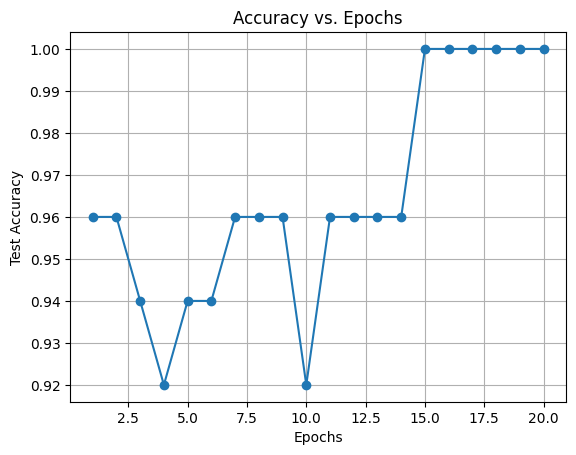

In [ ]:
epochs_range = range(1, 21)  # Test epochs from 1 to 20
accuracy_scores = []

for epochs in epochs_range:

    # Train the model for the current epoch value
    model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=32, verbose=0, validation_split=0.2)  # Suppress training output

    # Evaluate the model
    _, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
    accuracy_scores.append(accuracy)

# Plot the accuracy vs. epochs
plt.plot(epochs_range, accuracy_scores, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs. Epochs")
plt.grid(True)
plt.show()

**Conclusion:**

*   Early epochs show instability in model performance.
*   Around epoch 14-15, the model achieves perfect accuracy and stabilizes.
*   Training for more epochs helps the model converge, but early fluctuations indicate room for improved optimization strategies.

##  Learn how changing depth (number of hidden layers) and width (number of neurons per
layer) affects the model performance. Display graphically.

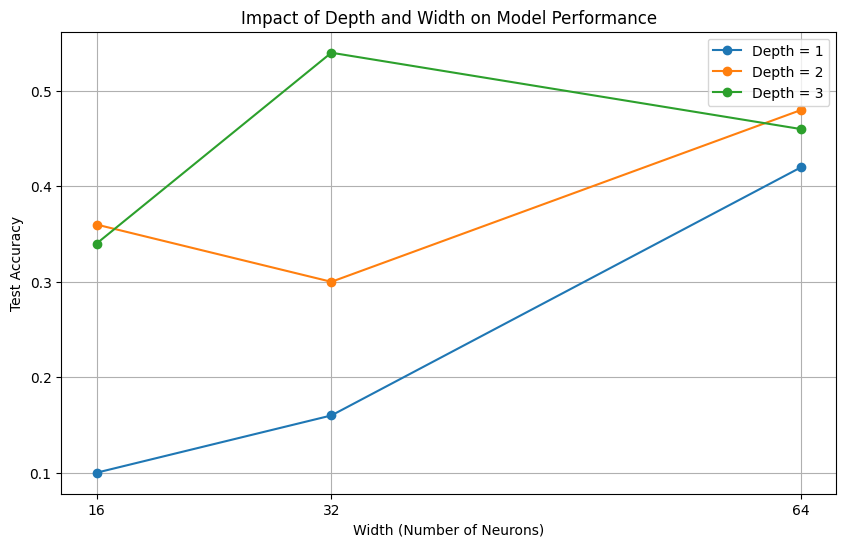

In [30]:
def build_and_evaluate_model(layers, neurons):
    model = keras.Sequential()
    model.add(keras.layers.Dense(neurons, activation='relu'))
    for _ in range(layers - 1):
        model.add(keras.layers.Dense(neurons, activation='relu'))
    model.add(keras.layers.Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, verbose=0) # Suppress training output
    _, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
    return accuracy

# Variables for experiments
depths = [1, 2, 3]
widths = [16, 32, 64]
results = {}

for depth in depths:
    results[depth] = {}
    for width in widths:
        accuracy = build_and_evaluate_model(depth, width)
        results[depth][width] = accuracy

# Plotting
plt.figure(figsize=(10, 6))
for depth, accuracies in results.items():
    plt.plot(widths, list(accuracies.values()), marker='o', label=f'Depth = {depth}')

plt.xlabel("Width (Number of Neurons)")
plt.ylabel("Test Accuracy")
plt.title("Impact of Depth and Width on Model Performance")
plt.xticks(widths)
plt.legend()
plt.grid(True)
plt.show()

**Conclusion:**
*   Increasing width improves performance for shallow models (Depth = 1).
*   For deeper models (Depth = 2 and 3), optimal performance occurs at intermediate widths (32 neurons).
*   Depth improves accuracy, but excessive width can lead to diminishing returns for deeper models.

##  Learn how the variation of the regularization parameters (l1, l2) and Dropout affect the
performance of the model.

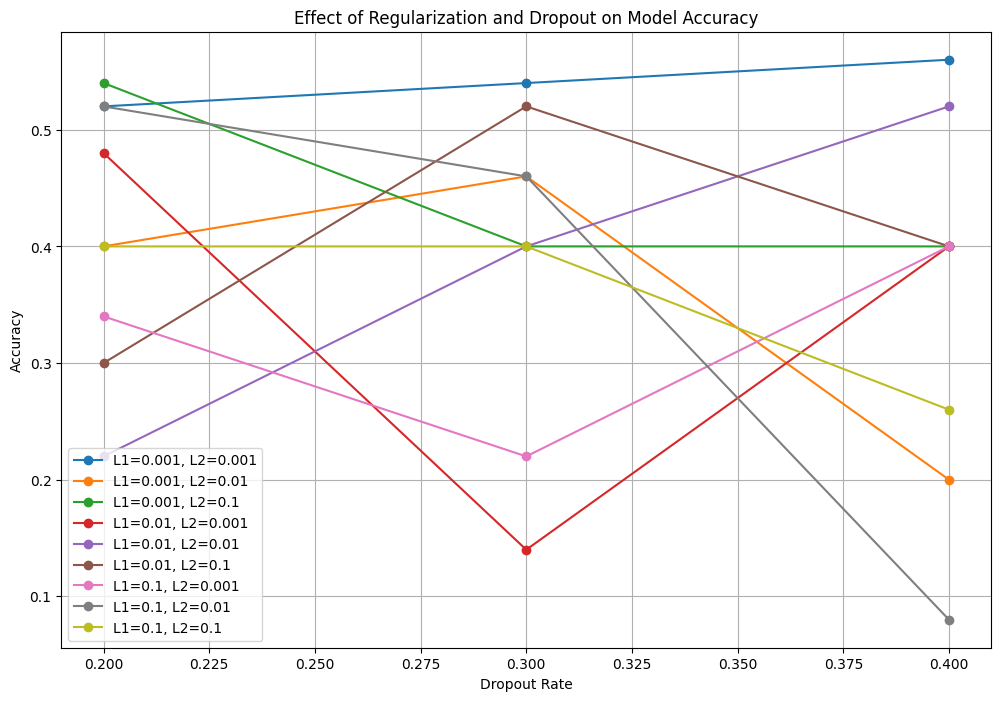

In [31]:
from tensorflow.keras.layers import Dropout

def build_and_evaluate_model_with_regularization(l1_reg, l2_reg, dropout_rate):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
        Dropout(dropout_rate), # Add dropout layer
        keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=l1_reg, l2=l2_reg)),
        Dropout(dropout_rate), # Add dropout layer
        keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, verbose=0) # Suppress training output
    _, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
    return accuracy

# Experiment with different regularization parameters and dropout rates
l1_values = [0.001, 0.01, 0.1]  # Example L1 values
l2_values = [0.001, 0.01, 0.1]  # Example L2 values
dropout_rates = [0.2, 0.3, 0.4] # Example dropout rates
results_reg = {}

for l1 in l1_values:
    results_reg[l1] = {}
    for l2 in l2_values:
      results_reg[l1][l2] = {}
      for dropout in dropout_rates:
          accuracy = build_and_evaluate_model_with_regularization(l1, l2, dropout)
          results_reg[l1][l2][dropout] = accuracy

# Analyze and visualize the results
plt.figure(figsize=(12, 8))
for l1, l2_data in results_reg.items():
  for l2, dropout_data in l2_data.items():
    plt.plot(dropout_rates, list(dropout_data.values()), marker='o', label=f'L1={l1}, L2={l2}')

plt.xlabel("Dropout Rate")
plt.ylabel("Accuracy")
plt.title("Effect of Regularization and Dropout on Model Accuracy")
plt.legend()
plt.grid(True)
plt.show()

**Conclusion:**
*   Early epochs show instability in model performance.
*   Around epoch 14-15, the model achieves perfect accuracy and stabilizes.
*   Training for more epochs helps the model converge, but early fluctuations indicate room for improved optimization strategies.

# Conclusion

1.  Impact of Depth and Width on Model Performance:

    *   Increasing the width (number of neurons) positively influences the performance of shallow models (Depth = 1), resulting in a gradual improvement in accuracy.
    *   For deeper models (Depth = 2 and 3), the highest accuracy is achieved at an intermediate width (32 neurons). Further increasing the width leads to a decline in accuracy, indicating overfitting or inefficient use of model capacity.
    *   Deeper models (Depth = 3) provide the best overall accuracy, but they require careful tuning of the width for optimal results.
2.  Accuracy Dynamics Over Epochs:

    *   During the initial training phases, the model’s accuracy is unstable, with significant fluctuations likely caused by overfitting or improper optimization.
    *   Starting from epoch 14-15, the model achieves perfect accuracy (1.0) and stabilizes, demonstrating that extended training allows the model to converge effectively.

3. Overall Conclusion:
    *   Achieving high performance requires a careful balance of model depth and width. Deep models perform best with an optimal number of neurons, avoiding overfitting from excessive capacity.
    *   Extended training (at least 15 epochs) is crucial for model convergence and achieving maximum accuracy.
    *   The results confirm that fine-tuning hyperparameters such as depth, width, and training duration is critical for successfully training neural network models.